In [1]:
from chemml.chem import Molecule
import pandas as pd
import os, sys

Using TensorFlow backend.
/opt/anaconda3/envs/my_chemml_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/my_chemml_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/my_chemml_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/my_

In [17]:
cn_smiles = 'CC1=CC(C2=NC=CC(C)=C2)=NC=C1'
mol = Molecule(cn_smiles, input_type='smiles')
mol

<chemml.chem.Molecule(
        rdkit_molecule : <rdkit.Chem.rdchem.Mol object at 0x157361710>,
        pybel_molecule : None,
        creator        : ('SMILES', 'CC1=CC(C2=N\\C=CC(C)=C2)=NC=C1'),
        smiles         : 'Cc1ccnc(-c2cc(C)ccn2)c1',
        smarts         : None,
        inchi          : None,
        xyz            : None)>

In [18]:
mol.hydrogens('add')
mol.to_xyz(optimizer='MMFF', mmffVariant='MMFF94s', maxIters=300) # 'UFF'

In [12]:
mol.to_xyz()

True

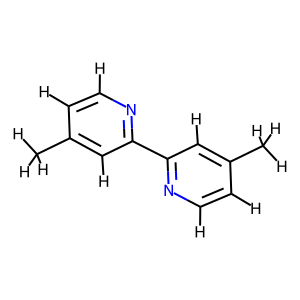

In [19]:
mol.visualize()

In [97]:
mol

<chemml.chem.Molecule(
        rdkit_molecule : <rdkit.Chem.rdchem.Mol object at 0x153f07710>,
        pybel_molecule : None,
        creator        : ('SMILES', 'Cc1ccc2n(->[Ir]34(<-n5cc(C)ccc5-c5cccc[c]53)(<-n3ccccc3-c3ccccn->43)[c]3ccccc3-2)c1'),
        smiles         : 'Cc1ccc2n(->[Ir]34(<-n5cc(C)ccc5-c5ccccc53)(<-n3ccccc3-c3ccccn->43)c3ccccc3-2)c1',
        smarts         : None,
        inchi          : None,
        xyz            : <XYZ(geometry: (67, 3), atomic_numbers: (67, 1), atomic_symbols: (67, 1))>)>

In [4]:
os.chdir('cn_xyz')

In [119]:
tot_num = len(mol.xyz.atomic_symbols)
with open('test_IrCNNN.xyz','w') as f:
    f.write('{}\n'.format(tot_num))
    f.write('IrCNNN\n')
    for i in range(tot_num):
        f.write('{}  {} {} {}\n'.format(mol.xyz.atomic_symbols[i][0], mol.xyz.geometry[i][0], mol.xyz.geometry[i][1], mol.xyz.geometry[i][2]))


## convert smiles to xyz

In [2]:
def smiles2xyz(Ir_smiles, xyz_name):
    mol = Molecule(Ir_smiles, input_type='smiles')
    mol.hydrogens('add')
    while True:
        try:
            mol.to_xyz(optimizer='MMFF', mmffVariant='MMFF94s', maxIters=300) # 'UFF'
        except:
            print("{} MMFF Error".format(xyz_name))
        try:    
            mol.to_xyz()
            break
        except:
            print("{} to_xyz Error".format(xyz_name))
        
    tot_num = len(mol.xyz.atomic_symbols)
    with open(xyz_name,'w') as f:
        f.write('{}\n'.format(tot_num))
        f.write('CN\n')
        for i in range(tot_num):
            f.write('{}  {} {} {}\n'.format(mol.xyz.atomic_symbols[i][0], mol.xyz.geometry[i][0], mol.xyz.geometry[i][1], mol.xyz.geometry[i][2]))
            
    return 1


In [21]:
os.chdir('..')

In [22]:
cwd = os.getcwd()
df = pd.read_csv(cwd+'/CN_smiles.csv')
df

,C^N,CN_smiles,CN_smiles_clean
0,1,C1(C2=[15N]C=CC=C2)=CC=CC=[13C]1,C1(C2=NC=CC=C2)=CC=CC=C1
1,2,CC(C=C1)=C[15N]=C1C2=CC=CC=[13C]2,CC(C=C1)=CN=C1C2=CC=CC=C2
2,3,CC(C=C1)=C[15N]=C1C2=CC=C(F)C=[13C]2,CC(C=C1)=CN=C1C2=CC=C(F)C=C2
3,4,CC(C=C1)=C[15N]=C1C2=CC=C(Cl)C=[13C]2,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2
4,5,CC(C=C1)=C[15N]=C1C2=CC=C(Br)C=[13C]2,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2
5,7,CC(C=C1)=C[15N]=C1C2=CC=C(C#N)C=[13C]2,CC(C=C1)=CN=C1C2=CC=C(C#N)C=C2
6,9,CC(C=C1)=C[15N]=C1C2=CC=C(OC)C=[13C]2,CC(C=C1)=CN=C1C2=CC=C(OC)C=C2
7,11,CC(C=C1)=C[15N]=C1C2=C(F)C=C(F)C=[13C]2,CC(C=C1)=CN=C1C2=CC=C(F)C=C2F
8,12,CC(C=C1)=C[15N]=C1C2=C(Cl)C=C(F)C=[13C]2,CC(C=C1)=CN=C1C2=CC=C(F)C=C2Cl
9,13,CC(C=C1)=C[15N]=C1C2=C(Br)C=C(F)C=[13C]2,CC(C=C1)=CN=C1C2=CC=C(F)C=C2Br


In [23]:
os.mkdir('cn_xyz_new')
os.chdir('cn_xyz_new')

In [24]:
for i in range(len(df)):
    Ir_smiles = df['CN_smiles_clean'][i]
    cn_i = df['C^N'][i]
    xyz_name = 'cn_'+str(cn_i)+'.xyz'
    status = smiles2xyz(Ir_smiles, xyz_name)
    print(status)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
